## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x_train,flatten = True):
    #x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
    #x_train = (x_train - x_train.mean()) / x_train.std()
    x_train = 2*((x_train - x_train.min()) / (x_train.max() - x_train.min()))- 1
    if flatten:
        x_train = x_train.reshape(x_train.shape[0],-1)
    return x_train

def preproc_y(y_train):
    y_train = keras.utils.to_categorical(y_train)
    return y_train

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(nurons = [1024,512,256,128,64,32,16]):
    input_layer = keras.layers.Input([x_train.shape[1]])
    
    for index,nuron in enumerate(nurons):
        print(index)
        if index == 0:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(x)
            
    output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
        
    model = keras.models.Model(inputs = [input_layer],outputs = [output_layer])
    return  model
model = build_mlp()     
model.summary()

0
1
2
3
4
5
6
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)      

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.8528 - accuracy: 0.3438 - val_loss: 1.6163 - val_accuracy: 0.4293
Epoch 2/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.5575 - accuracy: 0.4543 - val_loss: 1.5258 - val_accuracy: 0.4532
Epoch 3/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.4222 - accuracy: 0.5029 - val_loss: 1.4615 - val_accuracy: 0.4804
Epoch 4/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.3210 - accuracy: 0.5341 - val_loss: 1.3938 - val_accuracy: 0.5110
Epoch 5/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.2303 - accuracy: 0.5711 - val_loss: 1.3809 - val_accuracy: 0.5200
Epoch 6/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.1375 - accuracy: 0.6014 - val_loss: 1.3987 - val_accuracy: 0.5173
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 8s 157us/step - loss: 0.0855 - accuracy: 0.9726 - val_loss: 3.5272 - val_accuracy: 0.5391
Epoch 56/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.0853 - accuracy: 0.9729 - val_loss: 3.4494 - val_accuracy: 0.5392
Epoch 57/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.0789 - accuracy: 0.9757 - val_loss: 3.5846 - val_accuracy: 0.5464
Epoch 58/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.0831 - accuracy: 0.9734 - val_loss: 3.5086 - val_accuracy: 0.5385
Epoch 59/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 3.6883 - val_accuracy: 0.5374
Epoch 60/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 3.7282 - val_accuracy: 0.5297
Epoch 61/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.0777 - accuracy: 0.9756 - val

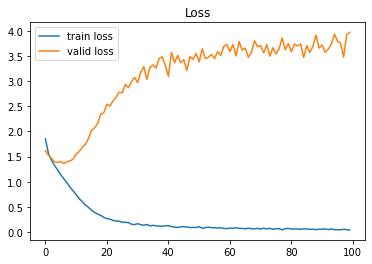

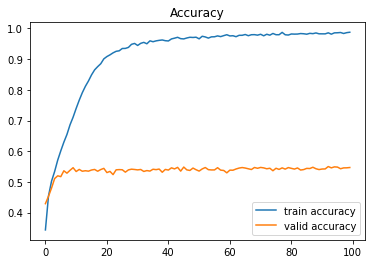

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()